In [112]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
#Load the data
train = pd.read_csv("https://datahack-prod.s3.amazonaws.com/train_file/train_ctrUa4K.csv")
test  = pd.read_csv("https://datahack-prod.s3.amazonaws.com/test_file/test_lAUu6dG.csv") 

In [114]:
#checking the first 5 rows
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [115]:
#make a copy of the data so we have the raw data 
train_original = train.copy()
test_original  = test.copy()

In [116]:
#check the no. of columns
len(train.columns)

13

In [117]:
#quick stats about the continuous variables 
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [118]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [119]:
#checking the data types of the columns 
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [120]:
# to find out the number of rows and columns in the dataset .shape
train.shape, test.shape

((614, 13), (367, 12))

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


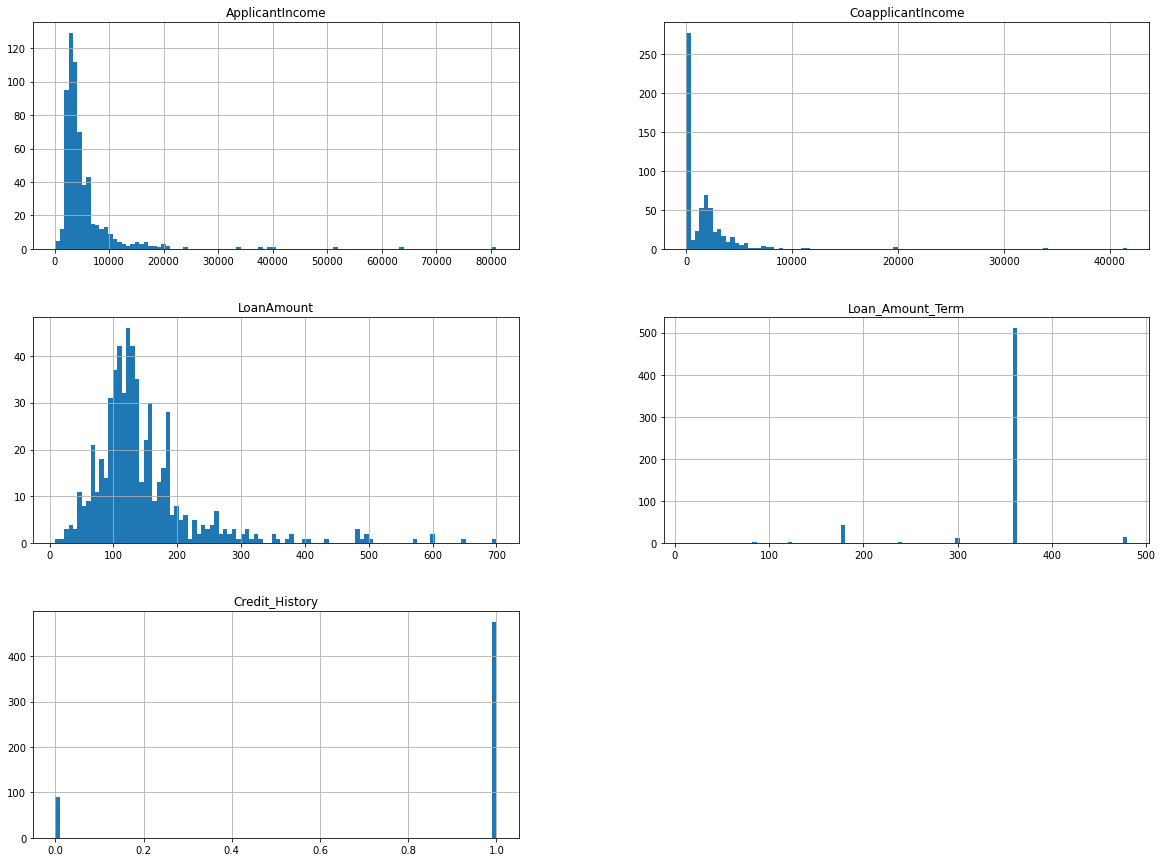

In [122]:
#undersatnd the distribution of the continuous variables 
train.hist(bins=100,figsize =(20,15))
plt.show()

* The distribution shows that train data is not normally distributed and credit_history is not a continous variable. 
* Credit_History is a categorical variable


### Univariate Analysis

Univariate Analysis is done to describe the single variable distribution in the dataset. Here, I have explored each variable separately and have tried to find pattern in the dataset.

In [123]:
# target variable

In [124]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [125]:
train['Loan_Status'].value_counts(normalize = 'True')

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

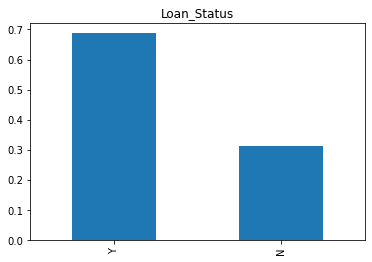

In [126]:
train['Loan_Status'].value_counts(normalize = 'True').plot.bar(title = 'Loan_Status')

In [127]:
#Ordinal Variables

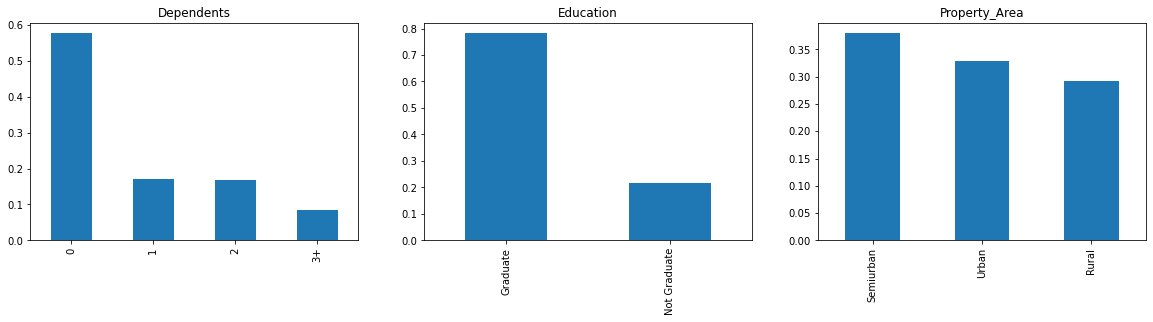

In [128]:
plt.subplot(131)
train['Dependents'].value_counts(normalize = 'True').plot.bar(figsize = (20,4),title = 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize = 'True').plot.bar(title= 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize = 'True').plot.bar(title = 'Property_Area')
plt.show()


In [129]:
#Categorical Variables

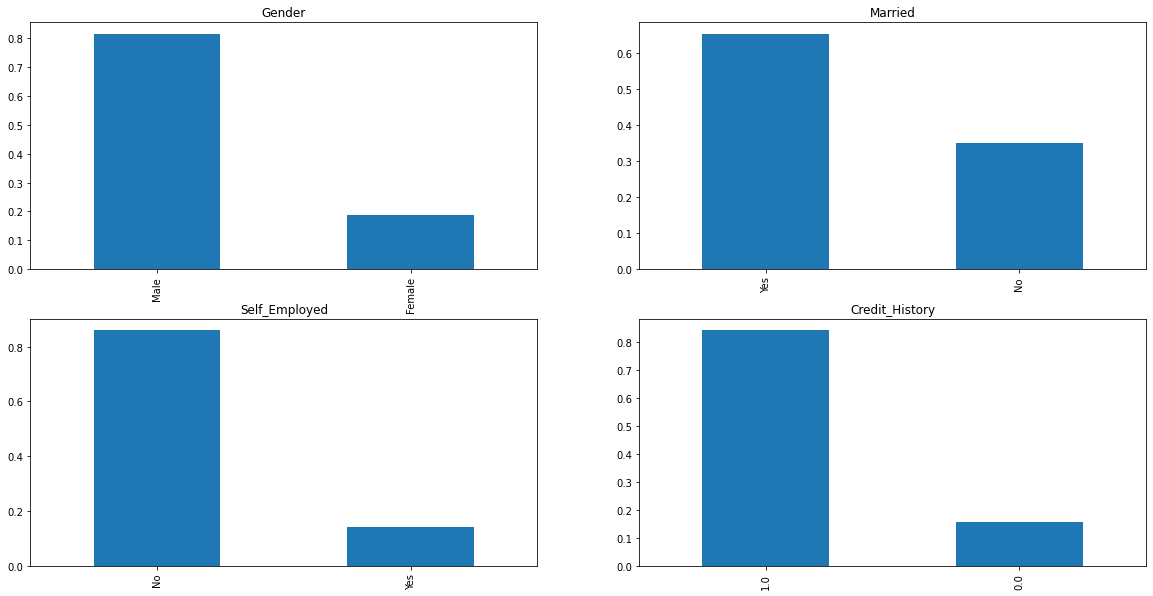

In [130]:
# plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

In [131]:
#Continous Variables

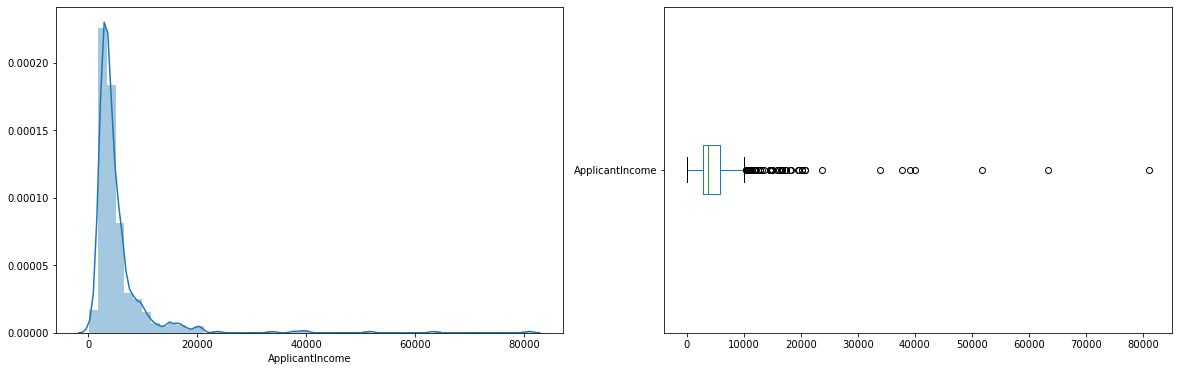

In [132]:
#ApplicantIncome

plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (20,6),vert = False)
plt.show()

# subplot 121 shows that ApplicantIncome is not normally distributed and is right skewed.
# subplot 122 shows that there are a lot of outliers

/Users/helly/anaconda2/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


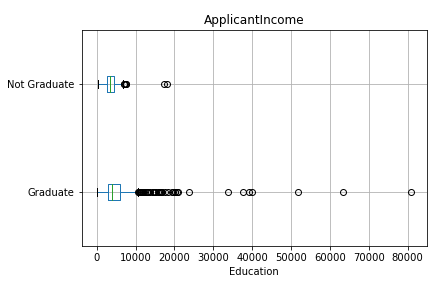

In [133]:
#analyzing applicant income on the basis of education
train.boxplot(column = 'ApplicantIncome', by = 'Education',vert = False) 
plt.suptitle(" ")
plt.show()

* Analysis shows that graduates are mostly with higher income (outliers)

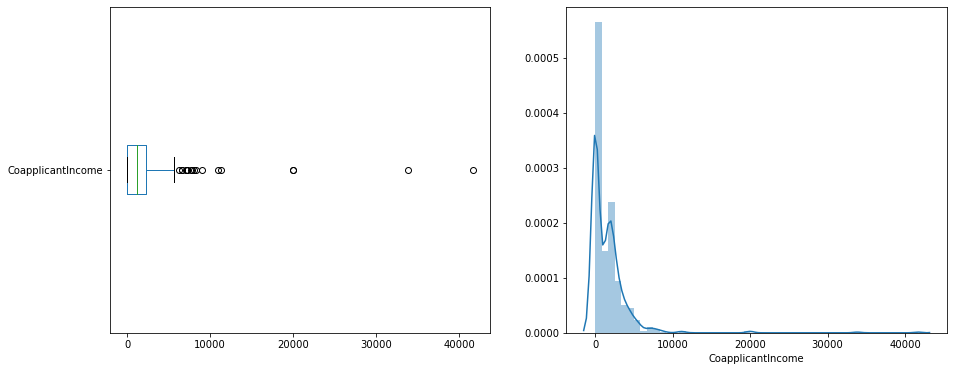

In [134]:
#CoapplicantIncome

plt.subplot(121)
train['CoapplicantIncome'].plot.box(figsize = (15,6),vert= False)
plt.subplot(122)
sns.distplot(train['CoapplicantIncome'])
plt.show()

#subplot 121 - shows outliers in co-applicantincome 
#subplot 122 - shows that co-applicantincome is not normally distributed and is right skewed 

/Users/helly/anaconda2/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


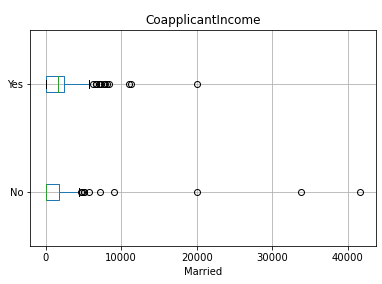

In [135]:
#Analysing relation between co-applicant income with being the status of married

train.boxplot(column = 'CoapplicantIncome',by = 'Married',vert = False )
plt.suptitle(" ")
plt.show()

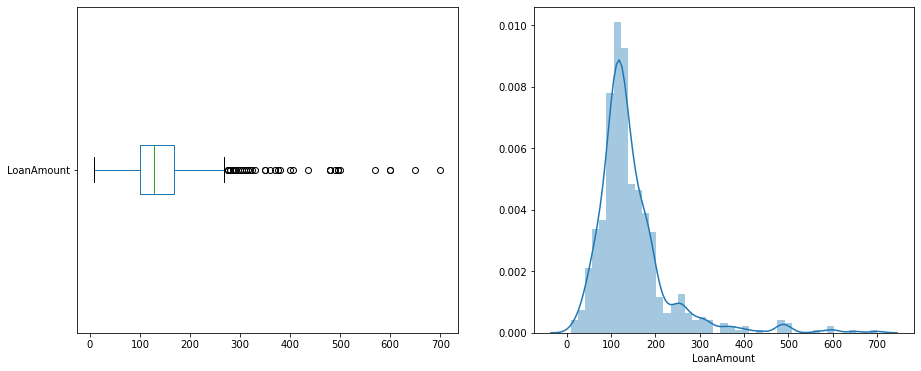

In [136]:
#LoanAmount

plt.subplot(121)
train['LoanAmount'].plot.box(figsize = (15,6),vert = False)
plt.subplot(122)
    
sns.distplot(train['LoanAmount'])
plt.show()

# LoanAmount is righly skewed

## Bivariate Analysis #

Bivariate Analysis is done to determine the relationship between two variables. It is also helpful in testing simple hypothesis of association.  

In [137]:
pd.crosstab(index = train['Gender'], columns = train['Loan_Status'], margins = True, normalize = 'index')

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252
All,0.311148,0.688852


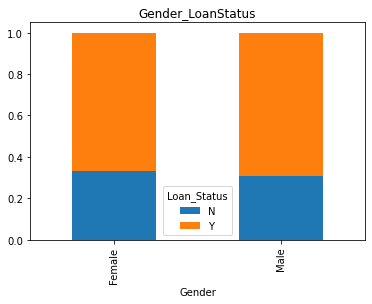

In [138]:
gender = pd.crosstab(index = train['Gender'], columns = train['Loan_Status'],normalize = 'index')
gender.plot(kind = 'bar',stacked = True, title = 'Gender_LoanStatus')
plt.show()

#this shows that the proportion is pretty much same of approved and unapproved loans

In [139]:
# gender = pd.crosstab(train['Gender'],train['Loan_Status']) - Another way to get the stacked bar chart
#gender.div(gender.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)

In [140]:
pd.crosstab(index=train['Gender'],columns=train['Loan_Status']).unstack().reset_index()

,Loan_Status,Gender,0
0,N,Female,37
1,N,Male,150
2,Y,Female,75
3,Y,Male,339


In [141]:
#Married and Loan_Status

In [142]:
pd.crosstab(index = train['Married'], columns = train['Loan_Status'],normalize = 'index')

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.283920,0.716080


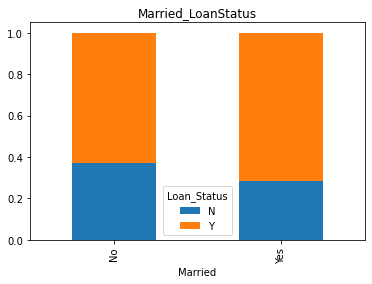

In [143]:
married = pd.crosstab(index = train['Married'], columns = train['Loan_Status'],normalize = 'index')
married.plot(kind = 'bar', stacked = True, title= 'Married_LoanStatus')
plt.show()

#the proportion of approved loans is higher for married people

In [144]:
#Education and Loan_Status

In [145]:
pd.crosstab(index = train['Education'],columns = train['Loan_Status'],normalize = 'index')

Loan_Status,N,Y
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


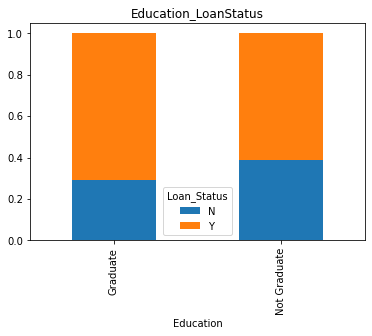

In [146]:
education = pd.crosstab(index = train['Education'],columns = train['Loan_Status'],normalize = 'index')
education.plot(kind = 'bar',stacked = True,title = 'Education_LoanStatus')
plt.show()

#proportion of loan approved is higher for graduate people

In [147]:
#Relation of Married and Education with Loan_Status

In [148]:
pd.crosstab(index = [train['Married'], train['Education']], columns = [train['Loan_Status']],normalize = 'index')

Loan_Status                  N         Y
Married Education                       
No      Graduate      0.369048  0.630952
        Not Graduate  0.377778  0.622222
Yes     Graduate      0.252427  0.747573
        Not Graduate  0.393258  0.606742

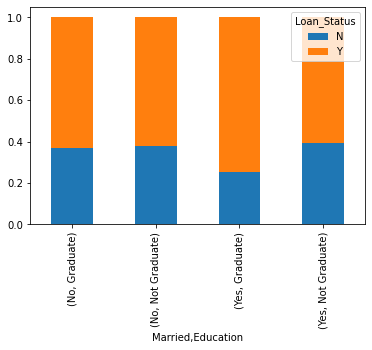

In [149]:
Married_Education=pd.crosstab(index = [train['Married'], train['Education']], columns = [train['Loan_Status']],normalize = 'index')
Married_Education.plot(kind = 'bar',stacked = True)
plt.show()

#Proportion of approved is the highest if a person is graduate and married

In [150]:
#Self-employed

In [151]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [152]:
pd.crosstab(index = train['Self_Employed'],columns = train['Loan_Status'], normalize = 'index')

Loan_Status,N,Y
Self_Employed,,
No,0.314000,0.686000
Yes,0.317073,0.682927


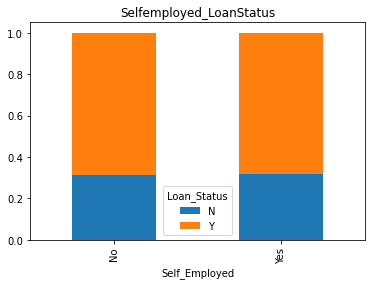

In [153]:
self_employed=pd.crosstab(index = train['Self_Employed'],columns = train['Loan_Status'], normalize = 'index')
self_employed.plot(kind = 'bar', stacked = True, title = 'Selfemployed_LoanStatus')
plt.show()

#No significant difference in loan_status for Self_Employed status

In [154]:
#Dependents 

In [155]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [156]:
pd.crosstab(index = train['Dependents'], columns = train['Loan_Status'],normalize = 'index')

Loan_Status,N,Y
Dependents,,
0,0.310145,0.689855
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


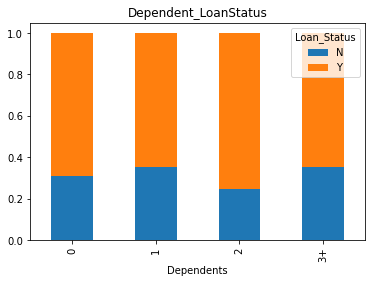

In [157]:
dependent = pd.crosstab(index = train['Dependents'], columns = train['Loan_Status'],normalize = 'index')
dependent.plot(kind = 'bar', stacked = True, title = 'Dependent_LoanStatus')
plt.show()

#Proportion of loan approved is higher for people with dependents 2; customers with 1 and 3+ has the same approval rate

In [158]:
#Property Area and Loan_Status

In [159]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [160]:
pd.crosstab(index = train['Property_Area'], columns = train['Loan_Status'],normalize = 'index')

Loan_Status,N,Y
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


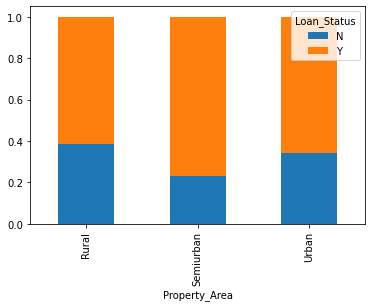

In [161]:
property_area =pd.crosstab(index = train['Property_Area'], columns = train['Loan_Status'],normalize = 'index')
property_area.plot(kind = 'bar',stacked = True)
plt.show()

#Proportion of loan approval is highest in case of Semiurban property

In [162]:
#Credit_history and Loan_Status

In [163]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [164]:
pd.crosstab(index = train['Credit_History'], columns = train['Loan_Status'],normalize = 'index')

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


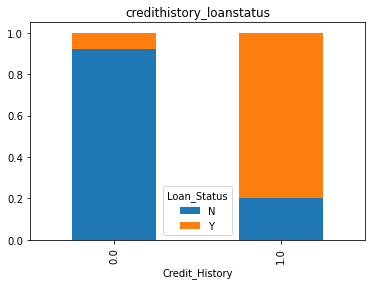

In [165]:
credit_history=pd.crosstab(index = train['Credit_History'], columns = train['Loan_Status'],normalize = 'index')
credit_history.plot(kind = 'bar',stacked = True, title = 'credithistory_loanstatus')
plt.show()

# Customers with credit_history as 1 are very likely to get a loan 

In [166]:
#continous variables #Applicant Income and Loan Status

#Hypothesis - If Applicant income is high then chances of loan approval would be high

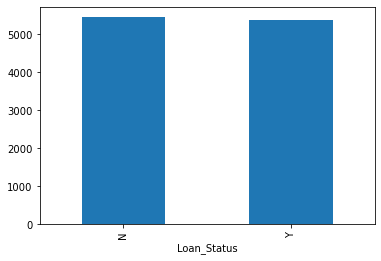

In [167]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

# Here we have grouped the loan_status by the mean of the applicant_income

In [168]:
train['d_loanstatus'] = np.where(train['Loan_Status'] == 'Y',1,0)
train['d_loanstatus'].corr(train['ApplicantIncome'])

# correaltion in applicant_income and loan status

-0.004709522659351538

In [169]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,d_loanstatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


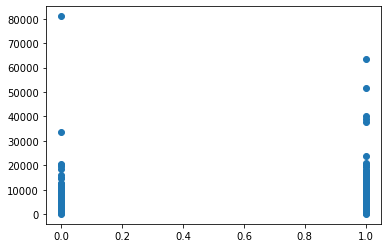

In [170]:
plt.scatter(train['d_loanstatus'],train['ApplicantIncome'])
plt.show()

In [171]:
#converting continuous variable Applicant Income into a categorical variable by making bins 

In [172]:
bins = [0,2500,5000,7500,81000]
group = ['Low', 'Average','High', 'Very High']
train['Income_bins']= pd.cut(train['ApplicantIncome'],bins, labels = group)
pd.crosstab(index = train['Income_bins'],columns = train['Loan_Status'],normalize = 'index')

Loan_Status,N,Y
Income_bins,,
Low,0.314815,0.685185
Average,0.314286,0.685714
High,0.316327,0.683673
Very High,0.301075,0.698925


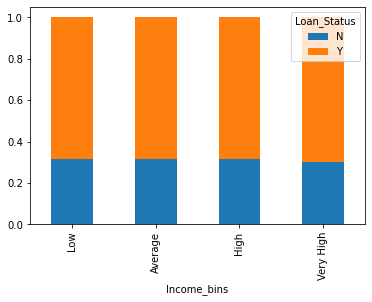

In [173]:
income_bin = pd.crosstab(index = train['Income_bins'],columns = train['Loan_Status'],normalize = 'index')
income_bin.plot(kind = 'bar', stacked = True)
plt.show()

# This shows that our hypothesis is wrong. Applicant income does not have effect on the status of the loan approval

In [174]:
#Co-applicant Income 

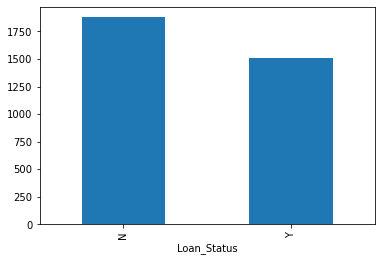

In [175]:
train.groupby(train['Loan_Status'])['CoapplicantIncome'].mean().plot.bar()

In [176]:
train['d_loanstatus'].corr(train['CoapplicantIncome'])

-0.05918731348785018

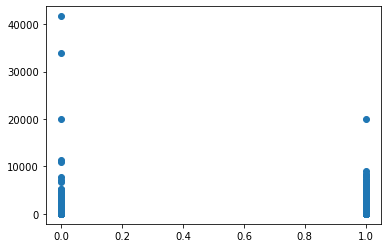

In [177]:
plt.scatter(train['d_loanstatus'],train['CoapplicantIncome'])

In [178]:
train['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [179]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['coapplicant_bins']= pd.cut(train['CoapplicantIncome'],bins, labels = group)
pd.crosstab(index = train['coapplicant_bins'], columns = train['Loan_Status'],normalize = 'index')


Loan_Status,N,Y
coapplicant_bins,,
Low,0.136364,0.863636
Average,0.274775,0.725225
High,0.329897,0.670103


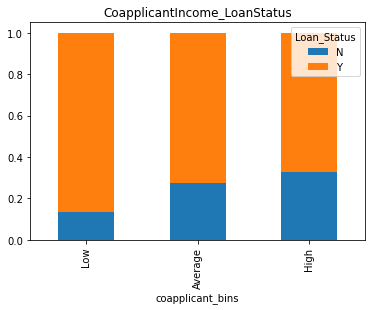

In [180]:
coapplicant_bins = pd.crosstab(index = train['coapplicant_bins'], columns = train['Loan_Status'],normalize = 'index')
coapplicant_bins.plot(kind= 'bar',stacked = 'True',title = 'CoapplicantIncome_LoanStatus')
plt.show()

# This shows that low income people have higher loan approval but there are 273 people whose coapplicant income is 0
#so that shows the coapplicant income does not matter much in loan approval

In [181]:
# Analyzing total income with Loan Status

In [182]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['Total_Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64

In [183]:
bins = [0,2500,4000,6000,82000]
groups = ['Low','Average','High','Very High']
train['Total_Income_bin']= pd.cut(train['Total_Income'],bins,labels = groups)

In [184]:
Total_Income_bin =pd.crosstab(index = train['Total_Income_bin'],columns = train['Loan_Status'],normalize = 'index')
Total_Income_bin

Loan_Status,N,Y
Total_Income_bin,,
Low,0.583333,0.416667
Average,0.268908,0.731092
High,0.290179,0.709821
Very High,0.327935,0.672065


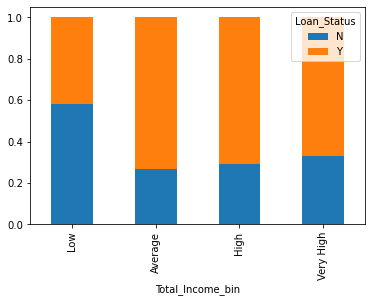

In [185]:
Total_Income_bin.plot(kind = 'bar',stacked = True)
plt.show()

# Now this shows that if income is under the range of 0 to 2500 then chances of loan approval is 41% only
# Another thing to note - if I change the bin size of low to 0-2000 then loan approval chances is 16.67% only

In [186]:
#Loan_amount and Loan_status

In [187]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [188]:
bins = [0,100,200,700] 
groups = ['Low','Average','High']
train['Loanamount_bin'] = pd.cut(train['LoanAmount'],bins,labels = groups)
pd.crosstab(index= train['Loanamount_bin'],columns = train['Loan_Status'],normalize = 'index')

Loan_Status,N,Y
Loanamount_bin,,
Low,0.305195,0.694805
Average,0.287709,0.712291
High,0.387500,0.612500


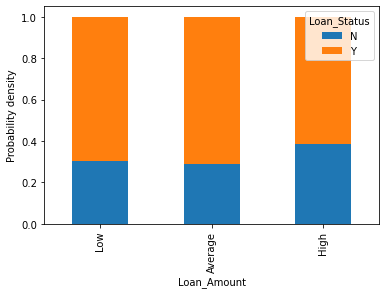

In [189]:
loanamount_bin =pd.crosstab(index= train['Loanamount_bin'],columns = train['Loan_Status'],normalize = 'index')
loanamount_bin.plot.bar(stacked = True)
plt.xlabel('Loan_Amount')
plt.ylabel('Probability density')
plt.show()

#This proves that hypohthesis that proportion of loan approved is higher for low and average loan amount. 

In [190]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,d_loanstatus,Income_bins,coapplicant_bins,Total_Income,Total_Income_bin,Loanamount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,Average,Average,6091.0,Very High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,High,NaN,6000.0,High,Average


In [191]:
#deleting the bin columns 
train = train.drop(['Total_Income_bin','Income_bins','coapplicant_bins','Loanamount_bin'], axis = 1)

In [192]:
train = train.drop(['Total_Income'],axis = 1)

In [193]:
#Dependents variable (3+ to 3)

train['Dependents'].replace('3+',3,inplace = True)
test['Dependents'].replace('3+',3,inplace = True)

In [194]:
train = train.drop(['d_loanstatus'], axis = 1) 

In [195]:
# As logistic regression takes only numeric variables so replacing 1 for 'Y' and 0 for 'N' in loanstatus

train['Loan_Status'].replace('Y',1,inplace = True)
train['Loan_Status'].replace('N',0,inplace = True)

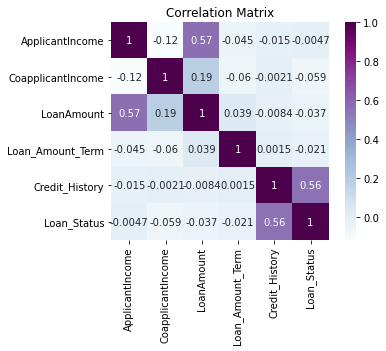

In [196]:
# correlation between all the numerical variables by making a heatmap
matrix = train.corr()
sns.heatmap(matrix, cmap ='BuPu',annot = True, vmax = 1, square = True)
plt.title('Correlation Matrix')
plt.show()

# highest correlation between Applicant income and Loan amount, Credit History and Loan status 

### Treating Missing Values

In [197]:
#Missing values
train.isnull().sum()

# Missing values in - Gender, married, dependents, Self-employed,Loan amount, Loan amount term and credit history

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [198]:
#Imputation of missing values by mode

train['Gender'].fillna(train['Gender'].mode()[0], inplace = True) 
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)


In [199]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)

In [200]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)

In [201]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace = True)

In [202]:
#Imputing LoanAmount by median instead of mean as it has lot of outliers so it might not give appropriate value
# so the mean would be highly affected by the outliers 

train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace = True)

In [203]:
#checking for missing values now
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [204]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [205]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace = True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace = True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace = True)

In [206]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Treating Outliers through Log Transformation 

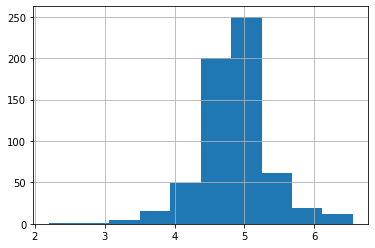

In [207]:
#Treaing Outliers LoanAmount - outliers affect the distribution of the data and highly affects the mean & std

train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins =10)
plt.show()
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [208]:
#dropping loan_id as it does not have any effect on loan status
train = train.drop('Loan_ID',axis = 1)
test = test.drop('Loan_ID',axis = 1)

### Modeling 

Using scikit-learn

In [209]:
#droping target variable from the train dataset and saving it another dataset
X = train.drop('Loan_Status',axis = 1)
y = train.Loan_Status

In [210]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test= pd.get_dummies(test)

In [211]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size = 0.3)

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight =None,dual = False,fit_intercept = True, intercept_scaling =1
                   ,max_iter=100,multi_class= 'ovr',n_jobs=1,penalty ='l2',random_state =1,
                   solver = 'liblinear',tol =0.0001,verbose=0,warm_start=False )

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [213]:
# predicting target variable on validation data and calculating accuracy
pred_val = model.predict(x_val)
accuracy_score(y_val,pred_val)

0.8108108108108109

In [214]:
#predicting the Loan_status on the test data
pred_test = model.predict(test)

### Modeling - stratified k-folds cross validation

In [215]:
from sklearn.model_selection import StratifiedKFold
i=1
scores = []
skf = StratifiedKFold(n_splits=5, random_state=1,shuffle = True)
for train_index, test_index in skf.split(X,y):
    print('\n{} of kfold {}'.format(i,skf.n_splits))
    xtr, xval = X.loc[train_index], X.loc[test_index]
    ytr, yval = y[train_index], y[test_index]
    model = LogisticRegression(random_state = 1)
    model.fit(xtr,ytr)
    predict_val = model.predict(xval)
    score = accuracy_score(yval, predict_val)
    scores.append(score)
    print('accuracy score', score)
    i+=1

predict_test = model.predict(test)
pred = model.predict_proba(xval)[:,1]
print('Average score of the k-folds is : {}'.format(sum(scores)/len(scores)))


1 of kfold 5
accuracy score 0.8048780487804879

2 of kfold 5
accuracy score 0.8373983739837398

3 of kfold 5


/Users/helly/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/helly/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

accuracy score 0.7804878048780488

4 of kfold 5
accuracy score 0.7886178861788617

5 of kfold 5
accuracy score 0.7950819672131147
Average score of the k-folds is : 0.8012928162068507


/Users/helly/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


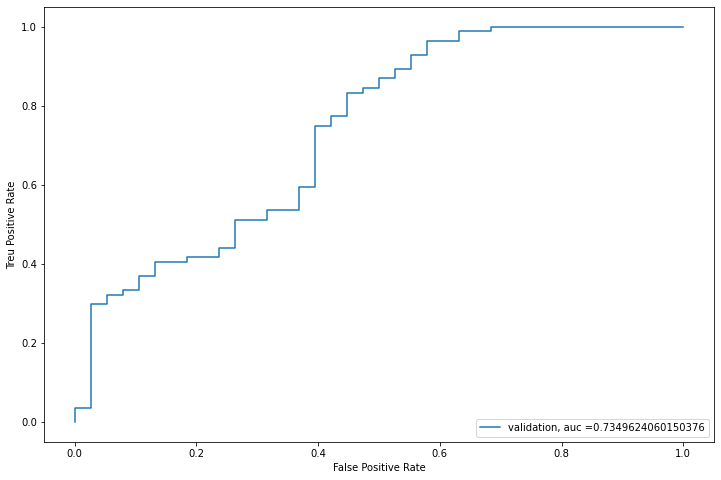

In [216]:
#Plotting Roc curve and finding auc 
from sklearn import metrics 
fpr,tpr, _ = metrics.roc_curve(yval, pred)
auc = metrics.roc_auc_score(yval,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label = "validation, auc =" +str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('Treu Positive Rate')
plt.legend(loc=4)
plt.show()

### Feature Engineering

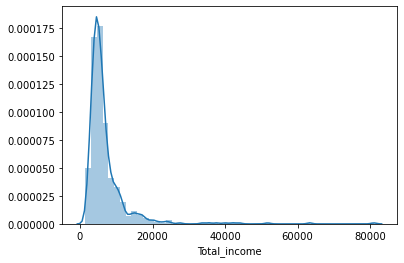

In [217]:
# Creating new variables which might affect the target variable

train['Total_income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_income'] = test['ApplicantIncome']+train['CoapplicantIncome']

sns.distplot(train['Total_income'])
plt.show()

/Users/helly/anaconda2/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


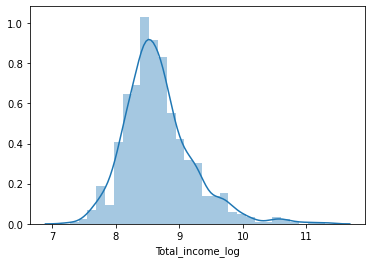

In [218]:
# Total_income is right skewed so log transformation to make it normally distributed

train['Total_income_log'] = np.log(train['Total_income'])
test['Total_income_log'] = np.log(test['Total_income'])
sns.distplot(train['Total_income_log'].dropna())
plt.show()

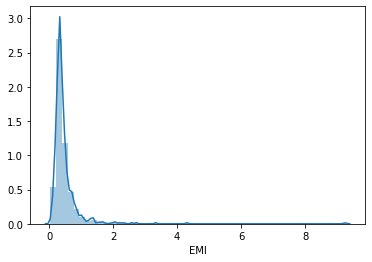

In [219]:
# Finding EMI amount on the basis of loan amount and loan amount term
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train.EMI)

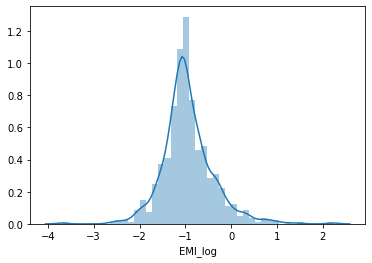

In [220]:
train['EMI_log'] = np.log(train['EMI'])
test['EMI_log'] = np.log(test['EMI'])
sns.distplot(train['EMI_log'])

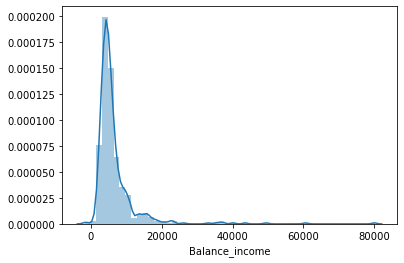

In [221]:
train['Balance_income'] = train['Total_income']-(train['EMI']*1000)
test['Balance_income'] = test['Total_income']-(test['EMI']*1000)
sns.distplot(train['Balance_income'])

/Users/helly/anaconda2/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


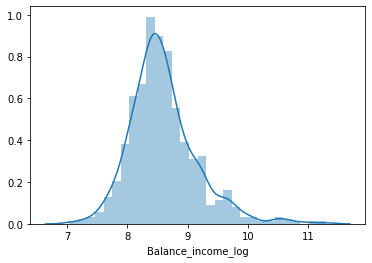

In [222]:
train['Balance_income_log']= np.log(train.Balance_income)
test['Balance_income_log'] = np.log(test.Balance_income)
sns.distplot(train['Balance_income_log'])

In [223]:
train.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Total_income               0
Total_income_log           0
EMI                        0
EMI_log                    0
Balance_income             0
Balance_income_log         2
dtype: int64

In [224]:
test.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Total_income               0
Total_income_log           0
EMI                        0
EMI_log                    0
Balance_income             0
Balance_income_log         3
dtype: int64

In [225]:
test['Balance_income_log'].fillna(train['Balance_income'].mean(),inplace = True)
train['Balance_income_log'].fillna(train['Balance_income'].mean(),inplace = True)

In [226]:
train.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Total_income               0
Total_income_log           0
EMI                        0
EMI_log                    0
Balance_income             0
Balance_income_log         0
dtype: int64

In [227]:
test.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Total_income               0
Total_income_log           0
EMI                        0
EMI_log                    0
Balance_income             0
Balance_income_log         0
dtype: int64

In [228]:
#dropping those variables which I used to create new variables
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [229]:
X = train.drop('Loan_Status',1)
y= train.Loan_Status #saving target variable in a separate dataset 

In [230]:
train = train.drop(['Total_income','EMI','Balance_income'],axis =1)
test = test.drop(['Total_income','EMI','Balance_income'],axis =1)

In [231]:
i=1
skf = StratifiedKFold(n_splits=5, random_state=1,shuffle = True)
for train_index, test_index in skf.split(X,y):
    print('\n{} of kfold {}'.format(i,skf.n_splits))
    xtr, xval = X.loc[train_index], X.loc[test_index]
    ytr, yval = y[train_index], y[test_index]
    model = LogisticRegression(random_state = 1)
    model.fit(xtr,ytr)
    predict_val = model.predict(xval)
    score = accuracy_score(yval, predict_val)
    print('accuracy score', score)
    i+=1

predict_test = model.predict(test)
pred = model.predict_proba(xval)[:,1]


1 of kfold 5
accuracy score 0.8048780487804879

2 of kfold 5
accuracy score 0.8373983739837398

3 of kfold 5
accuracy score 0.7804878048780488

4 of kfold 5


/Users/helly/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/helly/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

accuracy score 0.7967479674796748

5 of kfold 5
accuracy score 0.7377049180327869


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Decision Tree

In [ ]:
from sklearn import tree

i=1
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle = True)
for train_index, test_index in skf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr, xval = X.loc[train_index], X.loc[test_index]
    ytr, yval = y[train_index], y[test_index]
    model = tree.DecisionTreeClassifier(random_state = 1)
    model.fit(xtr,ytr)
    predict_val = model.predict(xval)
    score = accuracy_score(yval, predict_val)
    print('accuracy score', score)
    i+=1

predict_test = model.predict(test)